In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas.util.testing as tm
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
### input data
## data filename
datafilename1 = 'sepsis_survival_primary.csv'
datafilename2 = 'sepsis_survival_study.csv'
datafilename3 = 'sepsis_survival_validation.csv'

## depended Variable column name
dependVar = 'shares'
## exclude columns from analyze (text, urls, etc. )
excludeColumns = []
## minimum correlation coeff to assume as a key variable
minimumCorrCoef = 0.01



In [4]:
## read CSV file, autodetect delimeters, skip spaces in names
df1 = pd.read_csv(datafilename1, sep=None, engine="python", skipinitialspace=True)
df2 = pd.read_csv(datafilename2, sep=None, engine="python", skipinitialspace=True)
df3 = pd.read_csv(datafilename3, sep=None, engine="python", skipinitialspace=True)
dfs = [df1, df2, df3]

###dfclean = df.copy()

for df in dfs:
    ## exclude columns
    df.drop(excludeColumns, axis ='columns', inplace = True)
    ## and drop  all NaN
    df.dropna(inplace=True)
    ## place depended var into pos 0
    poped = df.pop(dependVar)
    df.insert(0, poped.name, poped)


KeyError: 'shares'

In [ ]:
dftrain = dfclean.sample(frac=0.8, random_state = 200) #training data set (80%)
dftest = dfclean.drop(dftrain.index) #testing data set (20%)

## Regular regressional analise through all possible variables

<AxesSubplot:>

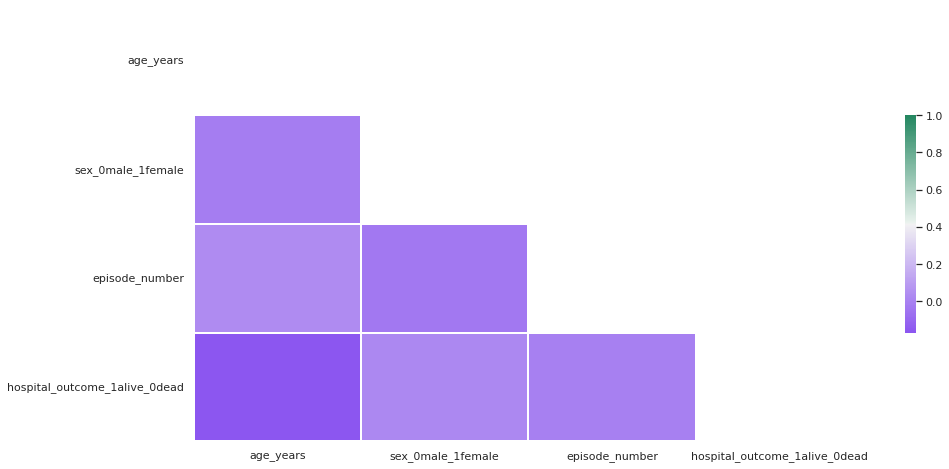

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="white")
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Custom colormap
cmap = sns.diverging_palette(275, 150, s=90, l=50, n=9, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, linewidths=0.3, cbar_kws={"shrink":0.5})

In [ ]:
def GetKeyVariables(df):
    parCorr = pd.DataFrame(df.corr() )
    n = len(parCorr.columns)
    keyVars = pd.DataFrame(columns=['key', 'val'])
    ## depended variable moved to index 0
    i = 0
    for j in range( n):
        if j >= i:
            keyVars = keyVars.append({'key':parCorr.columns[j],'val':parCorr.iloc[i, j]}, ignore_index=True)
    ## sort key vars by value
    keyVars.pop(df.columns[0])
    keyVars.sort_values(by='val', key=abs, ascending=False, inplace=True)
    return keyVars

display(GetKeyVariables(dftrain[[dependVar, *set1]]))
display(GetKeyVariables(dftrain[[dependVar, *set2]]))
display(GetKeyVariables(dftrain[[dependVar, *set3]]))
display(GetKeyVariables(dftrain[[dependVar, *set4]]))
display(GetKeyVariables(dftrain[[dependVar, *set5]]))
display(GetKeyVariables(dftrain))


In [ ]:
#for1 = dftrain.columns[4]+'~'+dftrain.columns[4]

In [ ]:
#mod = smf.ols(formula=for1, data = dftrain)
#res = mod.fit()
#res.summary()